In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from numba import cuda, vectorize
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import completeness_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA as sklearnPCA
from matplotlib.lines import Line2D
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from gensim.models import Word2Vec
import seaborn as sn
import pandas as pd
from sklearn import  svm,grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

C:\Users\Alin\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Alin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Alin\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In documents vom avea dataframe-ul

In [2]:
documents = pd.read_csv('Croitoru F Florinel-Alin.csv')
documents

,Unnamed: 0,Charles Dickens,Henry Rider Haggard,Edmund Burke,William Dean Howells,P G Wodehouse,Sir Arthur Conan Doyle,William Makepeace Thackeray,Jack London,Sir Walter Scott,...,John Ruskin,R M Ballantyne,Frank Richard Stockton,Daniel Defoe,Robert Louis Stevenson,Mark Twain,Charles Kingsley,Rudyard Kipling,Joseph Conrad,Thomas Carlyle
0,0,were charms to preserve its owner from sorrow ...,"stood by the open door, Martin, a helmet from ...",immediately proceeded to appoint him a guardia...,"that covered them. ""Cool off a little, first,""...",his finer feelings. But he has seen me only on...,vituperation. In one of his outbursts he thre...,have been better brought up to think well of h...,"lookin' for trouble, Slim,"" Fatty quavered. ""...","didna come before our een till e'enow?"" said O...",...,"brown combination of sulphur, soot, and gaslig...","luck, or good swimmin', or chance, or fate, or...","Lodloe, and paid little heed to the chatter of...",servant: and that as soon as I had got this ma...,"of snowy Alps, the blue Mediterranean, and th...",of people; but he didn't sit up nights to hate...,"itself, but that only made confusion worse con...","""Mamma!"" THE SECOND BAG Ah, well-a-day,...","incredible, restrained him. The captain came ...","disastrous and unfortunate he had yet made, or..."
1,1,into the lane to shake some bedside carpets. ...,the dark of the trees and smell their smell. Y...,"when they framed democratic governments, they ...",SEVEN ENGLISH CITIES by W. D. HOWELLS Illu...,THE POTHUNTERS by P. G. Wodehouse 1902 ...,"rather complex, and therefore interesting. Hi...","tallow; in Sir Hokey Walker's clerk's room, wh...",warmer. Buck was wildly glad. He knew he was a...,heroes by violating their tombs; partly to att...,...,it is only that _we_ cannot paint it. If we co...,"blue cloth, and bright scarlet cloth, and vari...","that he is, he has eaten up everything fit to ...","the utmost affliction; and now, indeed, and no...",may spell destruction to Samoa. I have writt...,doings there with exultation. I wish that old...,"drudgery sickened him, no disappointment anger...","twisted into knots, riven with rents and diamo...",Wretched old Allang went nearly mad with appre...,into the current epigrammatic redaction; the a...
2,2,felt it rather good in myself not to be proud ...,noted with a pang that as they went the lady B...,"distracted, must at length obtain a decided su...",grim bird that looks our way?-- Yon silent...,frightfully pretty girl with gold hair. If you...,"76th, 81st, and 82nd (Colonel McDonnell). Besi...","carriage not sent for me, Howell? There was no...","years. Danny's all right, but he ain't got go ...","said the old woman; ""I have heard a good man s...",...,"royal pilotage, being on the whole the most ...","to our prospects of finding deer hereabouts, a...",terrible fight seemed almost like a hand-to-ha...,tradesman ruined by marrying a good wife--in w...,night. We scrambled ashore and entered an _est...,"going out to dinner he said, ""I've known you ...","life, which is created after the likeness of G...","she isn't under White's dormitory at all yet.""...",allowed Makola to give them. A put-up job! See...,"somewhat;--and so (as the Abbe Georgel, in wor..."
3,3,traversing immense prairies. Thence by the lak...,"two beautiful sets that, my own being none of ...",those who put forward other candidates would b...,seeming to have learnt anything alarming; he s...,soda the gulf between non-acquaintance and war...,to breathe. There it was again! And again! Now...,"abominable cold glances, that run through me, ...","little bedroom, the occupant of which, a glove...","the assertion, that a king might take a lesson...",...,thus to secure a portion of it than none: but ...,turned aside and descended the nearest stairs....,of the _Arato_. Among other methods of precaut...,committed a great Mistake in it; for we percei...,"sincerely, ROBERT LOUIS STEVENSON. Letter:...",I have been misunderstood. I will e

Am descarcat un csv cu "stopwords"-urile din limba engleza. 
Aici salvez fisierul intr-o lista de stringuri.

In [3]:
import csv
with open('stopwords.csv', newline='') as csvfile:
     stopwords = list(csv.reader(csvfile))


Aceasta functie este folosita pentru a extrage cuvinte din documents, cuvintele sunt retinute cu litere mici.


In [4]:
import re
import csv
def extract_words(sentence):
    words = re.sub("[^(a-zA-Z0-9\')]+"," ", sentence).split()
    words_stopwords = [ w.lower() for w in words if w.lower() not in stopwords[0] and w != "'"]
    return words_stopwords
    

Aici apelez functia de mai sus pentru fiecare paragraf de autor.(adica fiecare celula din dataframe care contine text, exclud headerele cu numele autorilor)
(va dura ceva timp construirea lui words)

In [5]:
words = []
for i in range(1,21):
    for j in range(0,20):
         words.append (extract_words(documents[documents.columns[i]][j]));



Words va contine o lista de vectori care contin cuvinte. Are 400 de astfel de vectori. Contine cuvintele din documente care nu se afla printre multimea de stopwords

In [6]:
len(words)

400

Aici creez word vectorul folosind clasa Word2Vec din gensim. 
Argumentele:
- size = dimensiunea vectorului de feat-ururi
- min_count = numarul minim de aparitii ale unui cuvant pentru ca acesta sa fie luat in calcul
- workers - folosit pentru a rula mai rapid
La sfarsit stergem modelul si pastram doar word vector-ul.


In [7]:
import multiprocessing

model = Word2Vec(words, size=50, window = 5, min_count = 1, workers = multiprocessing.cpu_count())
wv = model.wv
del model



Functia average_word_vectors primeste ca parametru un vector de cuvinte, word vectorul (wv[word] este de fapt reprezentarea vectoriala pentru cuvantul word) si numarul de feat-ururi al vectorului.
Va returna vectorul de featururi pentru multimea de cuvinte words obtinut prin adunarea fiecarei reprezentari vectoriale a cuvintelor din multimea words si apoi valorile obtinute sunt impartite la nr de cuvinte.

In [8]:

def average_word_vectors(words, wv, num_features):
    feature_vector = np.zeros((num_features,),dtype = "float64")
    num_words = 0
    for w in words:
            num_words = num_words + 1
            feature_vector = np.add(feature_vector, wv[w])
    if num_words:
        feature_vector = np.divide(feature_vector, num_words)
    return feature_vector


Aceasta functie apeleaza functia anterioara pentru fiecare document(adica multime de cuvinte din paragrafele din dataframe).
Intoarce un vector care contine vectori de featururi.

In [9]:

def average_vectorizer(words, wv):
    x = [average_word_vectors(document, wv, num_features = 50) for document in words]
    return np.array(x)

Mai departe retinem in x vectorul de vectori de featururi obtinut pentru vectorul care contine vectori de cuvinte(words) 
si wv obtinut cu Word2Vec

In [10]:
x = average_vectorizer(words,wv)


Functie pentru a printa scorul obtinut pentru un y prezis si un y de input

In [11]:

def get_score(y_test, y_predict,labels):
    print ('Accuracy: ', np.round(metrics.accuracy_score(y_test, y_predict),3))
    print ('Precision: ', np.round(metrics.precision_score(y_test, y_predict,average='weighted'),3))
    print ('Recall: ', np.round(metrics.recall_score(y_test, y_predict, average = 'weighted'),3))
    print ('F1 Score: ', np.round(metrics.f1_score(y_test, y_predict, average = 'weighted'),3))
    matrix = confusion_matrix(y_test,y_predict,labels)
    df_matrix = pd.DataFrame(matrix,index = documents.columns[labels],columns = documents.columns[labels])
    plt.figure(figsize = (10,8))
    sn.heatmap(df_matrix, annot=True)

Aceasta functie antreneaza si printeaza scorurile obtinute de  un clasificator

In [12]:


def train_predict_evaluate(classifier, x_train, y_train, x_test, y_test,labels):
    
    classifier.fit(x_train,y_train)
    y_predict = classifier.predict(x_test)
    get_score(y_test, y_predict,labels)
    return y_predict;

Aceasta functie foloseste GridSearchCV pentru a cauta prin combinatiile de parametrii cea mai buna posibilitate

In [13]:

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10, 100]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernels}
    grid_search = GridSearchCV(svm.SVC(decision_function_shape = 'ovo'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

Aici ii atribui lui y(i) valoarea clasei(adica autorul codificat prin numar natural) caruia ii apartine x(i).
De asemenea, iau si cei mai buni parametrii

In [14]:
class_value = 0
y = []
for i in range(len(words)):
    if i%20 == 0:
        class_value = class_value + 1;
    y.append(class_value);
    
best_params = svc_param_selection(x,y,10)

    

In [15]:
def extract_column(x, nr_col):
    return [row[nr_col] for row in x]

Mai jos plotez in spatiu punctele ale caror coordonate sunt reprezentate de primele 3 feat-ururi (nu neaparat cele mai importante feat-ururi) din vectorii de featururi ale primelor 40 de documente (adica paragrafele primelor 2 autori)

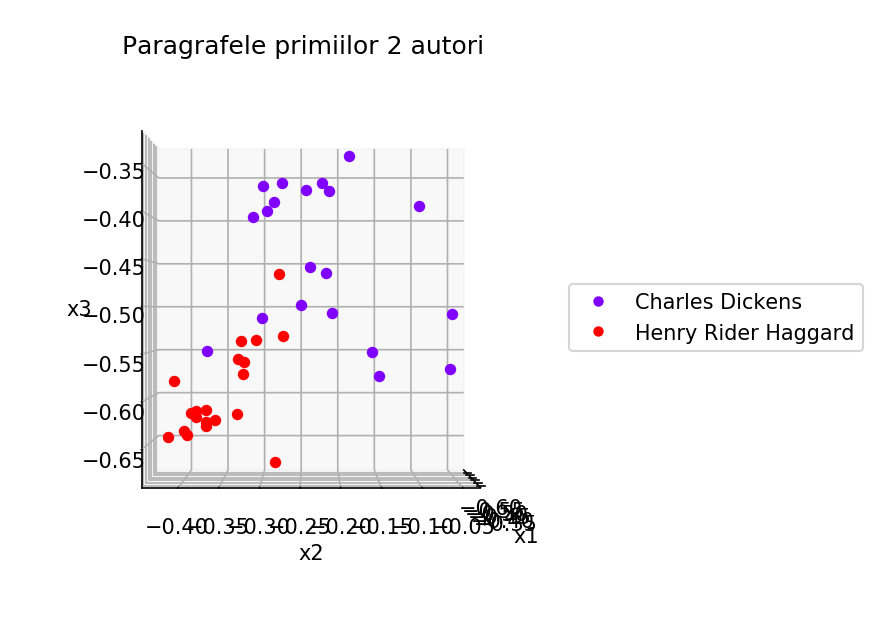

In [16]:


colors = cm.rainbow(np.linspace(0, 1, 2))
legend_elements = [Line2D([0], [0],markerfacecolor=color, marker = 'o', color = 'w',
                         label=documents.columns[index+1]) for index,color in enumerate(colors)]
figure = plt.figure(figsize=(4, 4), dpi=150)

ax = Axes3D(figure, rect=[0, 0, .95, 1], elev=0, azim=0)
for j in range(40):
    ax.scatter(x[j][0],x[j][1],x[j][2], c = colors[j//20])
plt.title("Paragrafele primiilor 2 autori")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
legend = plt.legend(handles = legend_elements,loc = 'right',bbox_to_anchor=(1.5,0.5))
figure.savefig('samplefigure', bbox_extra_artists=(legend,), bbox_inches='tight')

Splituiesc datele in date de test si antrenare

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y)


Folosesc parametrii cei mai buni obtinuti anterior pentru a crea un clasificator si il antrenez, iar apoi il evaluez.

Accuracy:  0.92
Precision:  0.93
Recall:  0.92
F1 Score:  0.919


array([17,  8, 12, 14, 19, 20,  5, 20, 20,  7,  6,  8, 16, 13,  6,  6, 11,
        1,  2, 14, 14,  3, 18,  1,  1,  7,  4, 10,  6, 14, 13, 12, 18,  2,
       14, 18, 11,  2, 13, 15,  4,  5, 15, 14,  4, 11, 20,  4,  3, 15, 14,
       19, 17,  6,  4,  9, 10,  4,  3,  6,  2,  2,  2,  2, 15, 16,  1, 12,
       10, 11, 15, 11, 15, 15,  1,  2,  4, 17,  6, 18, 18,  4, 10, 19,  8,
        4,  4, 11,  9,  1,  6,  5, 15, 14, 19, 10,  7,  7,  5, 17])

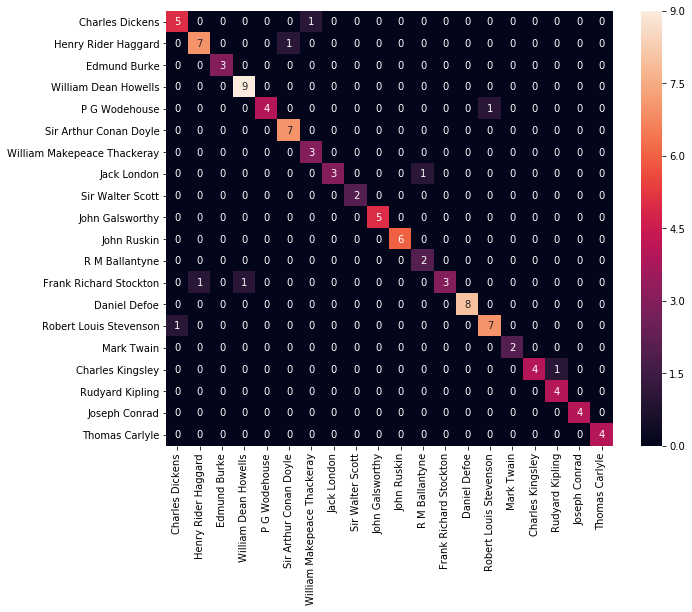

In [18]:

clf = SVC(C = best_params['C'], gamma = best_params['gamma'], kernel = best_params['kernel'] )
train_predict_evaluate(clf, x_train, y_train, x_test, y_test,range(1,21))


Obtin vectorul de feat-ururi folosind TfidfVectorizer pentru a compara cu scorurile obtinute anterior.

Construiesc inputul pentru TfidfVectorizer.

In [19]:
docs = []
for i in range(1,21):
    for j in range(0,20):
        docs.append(documents[documents.columns[i]][j])

        

Obtin in X vectorul echivalent pentru x-ul obtinut anterior print Word2Vec, cu exact acelasi nr de features.

In [20]:

tfidfVectorizer = TfidfVectorizer(stop_words = text.ENGLISH_STOP_WORDS, max_features = 50, min_df = 0.15)
x_tfidf = tfidfVectorizer.fit_transform(docs)
X = x_tfidf.toarray()

Parcurg pasii pe care i-am facut si anterior pentru a evalua x.

In [21]:
class_value = 0
y = []
for i in range(400):
    if i%20 == 0:
        class_value = class_value + 1;
    y.append(class_value);
    

In [22]:
best_params2 = svc_param_selection(X,y,10)

Accuracy:  0.89
Precision:  0.922
Recall:  0.89
F1 Score:  0.892


array([10,  6,  6, 10,  3,  2,  1, 13, 14,  1,  6, 16,  2,  8,  5, 18,  8,
       13, 19,  7,  1,  9, 13,  8,  3,  4, 20, 13, 20, 17,  2,  2,  3, 12,
        4, 11, 13, 18,  6,  7, 11, 10,  8,  2, 11,  1, 18, 20,  4, 11,  3,
       13, 20, 18, 15, 16, 20, 10, 12,  5, 19, 11, 15,  8, 13,  3, 12, 15,
       17, 12,  8, 10,  8,  5, 15,  7,  1, 11,  5,  2, 10, 16, 14,  1, 15,
       18,  1,  3,  3, 13,  6, 12, 20, 20, 14, 12,  5,  4,  7, 12])

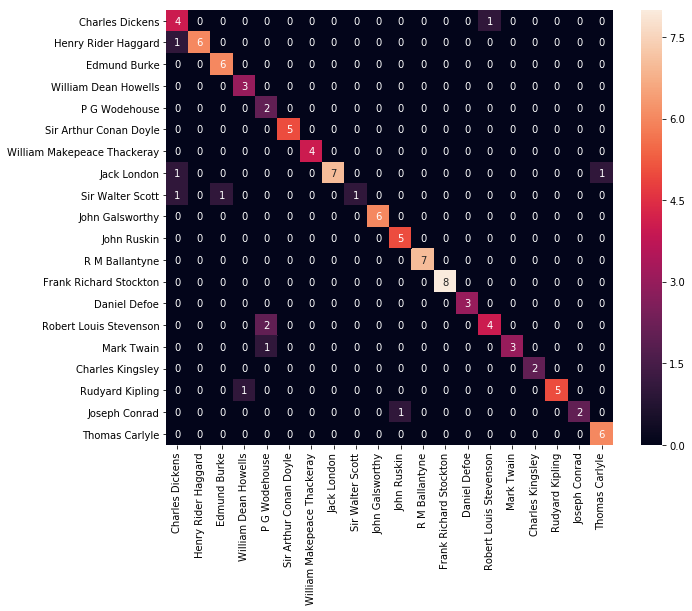

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,y)
clf2 = SVC(C = best_params2['C'], gamma = best_params2['gamma'], kernel = best_params2['kernel'] )
train_predict_evaluate(clf2, x_train, y_train, x_test, y_test,range(1,21))

Conform scorurilor de mai sus si matricelor de confuzie. Rezultatul obtinut de catre primul clasificator este putin mai bun.
De aceea mai departe vom folosi pe x si nu pe X.

Normalizam featururile din x

In [24]:

x_std = normalize(x)

Calculez valorile proprii si vectorii proprii pentru ca o sa avem nevoie in a decide cate componente principale sa pastram.

In [25]:
cov_matrix = np.cov(x_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix.T)
eigenvalues.shape

(50,)

In proc_val(i) retinem procentul de informatie pe care il contine principala componenta i.

Text(0,0.5,'% informatie continuta')

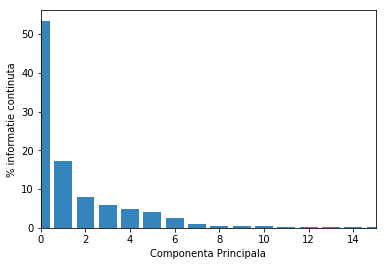

In [26]:
suma = np.sum(eigenvalues)
proc_val = [((i/suma)*100) for i in sorted(eigenvalues,reverse = True)]
plt.figure(figsize=(6,4))
plt.bar(range(len(eigenvalues)), proc_val,alpha = 0.9, align = 'center' )
plt.xlim([0,15])
plt.xlabel("Componenta Principala")
plt.ylabel('% informatie continuta')

Din graficul de mai sus se vede clar ca primele 8 componente contin aproape toata informatia necesara.


In [27]:

sklearn_pca = sklearnPCA(n_components=8)
x_PCA = sklearn_pca.fit_transform(x_std)


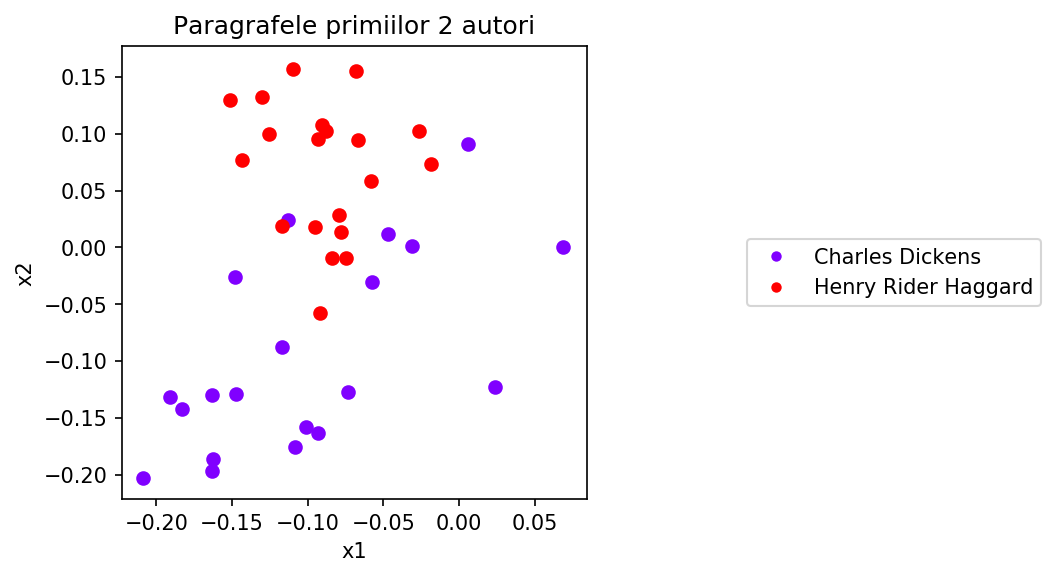

In [28]:

colors = cm.rainbow(np.linspace(0, 1, 2))
legend_elements = [Line2D([0], [0],markerfacecolor=color, marker = 'o', color = 'w',
                         label=documents.columns[index+1]) for index,color in enumerate(colors)]
figure = plt.figure(figsize=(4, 4), dpi=150)

for j in range(40):
    plt.scatter(x_PCA[j][0],x_PCA[j][1], c = colors[j//20])
plt.title("Paragrafele primiilor 2 autori")
plt.xlabel("x1")
plt.ylabel("x2")
legend = plt.legend(handles = legend_elements,loc = 'right',bbox_to_anchor=(2,0.5))
figure.savefig('samplefigure', bbox_extra_artists=(legend,), bbox_inches='tight')

In [29]:
best_params3 = svc_param_selection(x_PCA,y,10)

Accuracy:  0.8
Precision:  0.815
Recall:  0.8
F1 Score:  0.796


array([15,  4,  3, 19, 12, 13, 20, 14, 18, 19,  4,  2,  6,  9,  6,  4, 20,
        9, 12,  8,  5,  6,  4,  2,  3, 20,  1, 11, 15, 14,  6,  8, 19,  4,
        1,  3,  1,  7, 15, 14,  5,  9,  8,  9,  9, 15, 11, 19, 20,  2, 13,
       17,  1,  8, 16,  2, 20, 16,  9, 17, 12,  2,  4,  4, 15,  9, 20, 16,
        8,  7,  6, 14, 14, 16, 14, 10, 18, 11,  4, 11, 18, 17,  4, 11,  3,
        4,  5, 20,  4,  5, 11,  7, 11, 15,  2,  7, 16,  5, 13, 15])

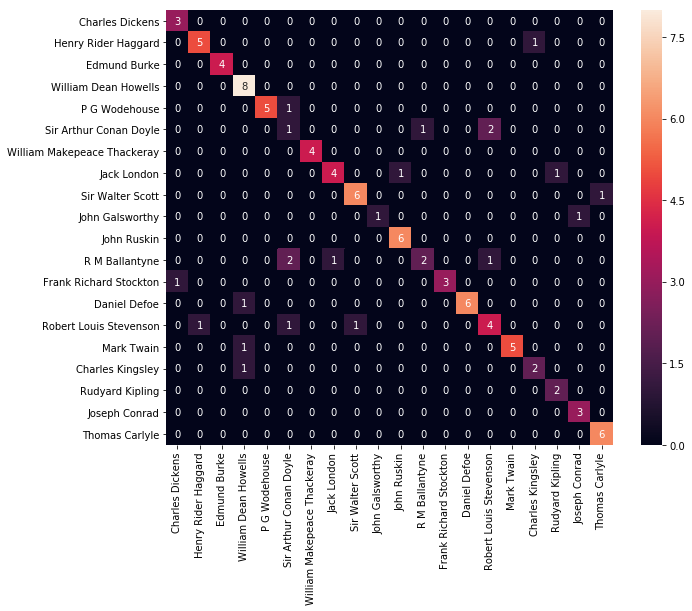

In [30]:

clf3 = SVC(C = best_params3['C'], gamma = best_params3['gamma'], kernel = best_params3['kernel'] )
x_train, x_test, y_train, y_test = train_test_split(x_PCA,y)
train_predict_evaluate(clf3, x_train, y_train, x_test, y_test,range(1,21))

Scorul, obtinut de clasificatorul care foloseste ca date de antrenare date din x_PCA, nu este la fel de bun ca cel obtinut de clf antrenat cu x. Iar acest lucru este normal, insa este foarte bun rezultatul obtinut de clf3 avand in vedere reducerea considerabila de feat-ururi.

Aceasta functie alege cel mai bun model pentru metoda KMeans de clustering. Cel mai bun model fiind raportat la silgouette_score

In [31]:

def Kmeans_param_selection(X):
    init = ['k-means++', 'random']
    y = []
    best_result = -1;
    for i in range(5,30):
        for j in range(2):
            km = KMeans(n_clusters = i, init = init[j])
            km.fit(X)
            y_pred = km.predict(X)
            if silhouette_score(X,y_pred) > best_result:
                y = y_pred
                best_result = silhouette_score(X,y_pred)
                km_result = km;
    return km_result;
    
    

Printez scorurile obtinute de model-ul obtinut din functia anterioara.
Se observa ca silhouette score nu este foarte bun, ceea ce inseamna elementele nu sunt foarte similare cu cluster-ul asociat.
De asemenea homogeneity_score ne arata cat de mult cluster-ul asociat observatiilor corespunde cu clasa(adica nr-ul natural asociat autorilor). In acest caz este destul de  mic, ceea ce inseamna ca KMeans nu grupeaza documentele in functie de autor.

In [32]:


km = Kmeans_param_selection(x_PCA);
y_pred = km.predict(x_PCA);
print("Silhouette score: ",silhouette_score(x_PCA,y_pred))
print("Homogeneity score: ",homogeneity_score(y,y_pred))
print("Completeness score: ",completeness_score(y,y_pred))

Silhouette score:  0.2544094606358112
Homogeneity score:  0.5106780408688862
Completeness score:  0.6417965709671006


In [33]:
import random
def get_colors(n):
  ret = []
  r = int(random.random() * 256)
  g = int(random.random() * 256)
  b = int(random.random() * 256)
  step = 256 / n
  for i in range(n):
    r += step
    g += step*3
    b += step*2
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    ret.append((r,g,b))
  return ret

Se poate observa si din plot faptul ca KMeans nu a grupat datele dupa autori, fiindca nr-ul de autori este 20 si se obtin doar 10 clustere

Text(6.66667,0.5,'x2')

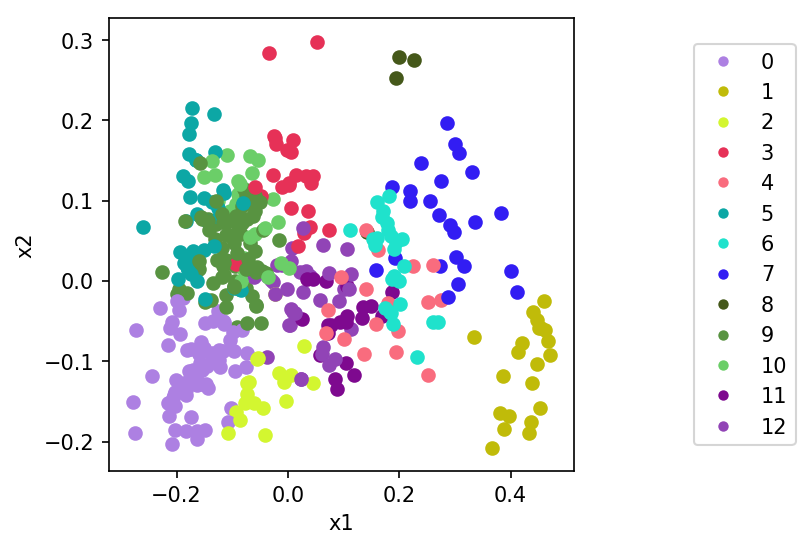

In [34]:

col = get_colors (len(np.unique(y_pred)))
legend_elements = [Line2D([0], [0],markerfacecolor=tuple(x/255.0 for x in color), marker = 'o', color = 'w',
                         label=index) for index,color in enumerate(col)]
figure = plt.figure(figsize=(4, 4), dpi=150)
for j in range(400):
    plt.scatter(x_PCA[j][0],x_PCA[j][1], color = tuple(x/255.0 for x in col[y_pred[j]]))
legend = plt.legend(handles = legend_elements,loc = 'right',bbox_to_anchor=(1.5,0.5))
figure.savefig('samplefigure', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.xlabel("x1")
plt.ylabel("x2")

Pentru DBSCAN avem nevoie de distanta pana la al k-lea cel mai apropiat vecin. O calculam folosind functia kneighbors din NearestNeighbors. Functia intoarce un vector de distante cu cei mai apropiati k vecini, noi alegem a k-a distanta.

In [35]:

def dbscan_select_param(x):
    k = 5
    knn = NearestNeighbors(n_neighbors=k,p=4)
    knn.fit(x)
    dist,indices = knn.kneighbors(x);
    return dist,indices;
    

Sortam distanta fata de al 4-lea cel mai apropiat vecin, pentru a plota.

In [36]:
result = dbscan_select_param(x_PCA)
dist_k = [dist[4] for dist in result[0]]
dist_k.sort()
dist_k

[0.028133076320462937,
 0.029681239395088085,
 0.031378900343065924,
 0.03206263972580717,
 0.032886621348105986,
 0.03308921021750342,
 0.0337437200016521,
 0.03389142771033175,
 0.03412088704734974,
 0.03412088704734974,
 0.03470681459770187,
 0.035216707331255315,
 0.0358030415724073,
 0.03611567937750737,
 0.03628853671241789,
 0.03630302490626197,
 0.03639788285362015,
 0.036459424395923534,
 0.03754095233984834,
 0.03774369298973542,
 0.03795911934359174,
 0.03808219993426866,
 0.03882657866885804,
 0.03923585834512284,
 0.03956547873322277,
 0.03966590484087644,
 0.04006754189858874,
 0.04006754189858874,
 0.040372315361225986,
 0.04044148409498828,
 0.04081047869802421,
 0.040831174616952653,
 0.04092941075546913,
 0.042692879654051066,
 0.04271899042157698,
 0.04271899042157698,
 0.04276383524949371,
 0.042777181774717524,
 0.04293953093135362,
 0.04295578732490583,
 0.04295578732490583,
 0.043015116470751374,
 0.04303993078294178,
 0.04326186198064605,
 0.04333389395209742,
 

Plotez "functia" distantei pana la al k-lea cel mai apropiat vecin.

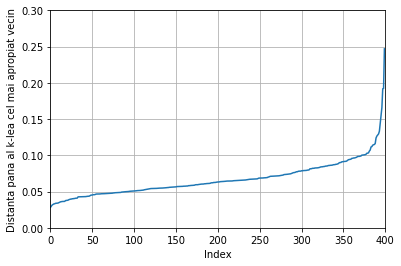

In [37]:
plt.figure(figsize=(6,4))
plt.plot(range(400),dist_k,'-')
plt.xlabel("Index")
plt.ylabel("Distanta pana al k-lea cel mai apropiat vecin")
plt.xlim([0,400])
plt.ylim([0,0.3])
plt.grid()

Din plotul de mai sus putem trage concluzia ca o valoare buna pentru epsilon este 0.2

In [38]:
eps = 0.2

Se observa ca homogeneity score este foarte mic, ceea ce inseamna din nou ca un cluster nu poate fi asociat cu o clasa.

In [39]:

k = 4
dbscan = DBSCAN(eps = eps, min_samples = k,metric = 'l2')

y_pred = dbscan.fit_predict(x_PCA)
print("Silhouette score: ",silhouette_score(x_PCA,y_pred))
print("Homogeneity score: ",homogeneity_score(y,y_pred))
print("Completeness score: ",completeness_score(y,y_pred))

Silhouette score:  0.3270814543305469
Homogeneity score:  0.008325282608671056
Completeness score:  0.44535061556032196


Text(6.66667,0.5,'x2')

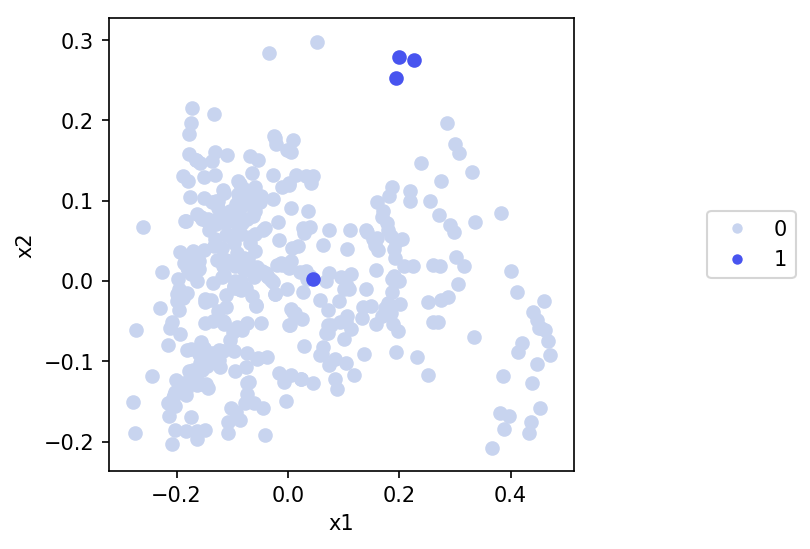

In [40]:

col = get_colors (len(np.unique(y_pred)))
legend_elements = [Line2D([0], [0],markerfacecolor=tuple(x/255.0 for x in color), marker = 'o', color = 'w',
                         label=index) for index,color in enumerate(col)]
figure = plt.figure(figsize=(4, 4), dpi=150)
for j in range(400):
    plt.scatter(x_PCA[j][0],x_PCA[j][1], color = tuple(x/255.0 for x in col[y_pred[j]]))
legend = plt.legend(handles = legend_elements,loc = 'right',bbox_to_anchor=(1.5,0.5))
figure.savefig('samplefigure', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.xlabel("x1")
plt.ylabel("x2")

In [41]:
def get_best_AgglomerativeClustering(x):
    best_result = 0.0;
    for i in range(5,21):
            agg = AgglomerativeClustering(n_clusters = i)
            y_pred = agg.fit_predict(x)
            if silhouette_score(x,y_pred) > best_result:
                y = y_pred
                best_result = silhouette_score(x,y_pred)
                agg_result = agg;
    return agg_result;

Cu acest model obtinem cel mai mare completeness score si homogeneity score ceea ce inseamnca este cel mai aproape de a grupa datele dupa autori.

In [42]:

agg = get_best_AgglomerativeClustering(x_PCA)
y_pred = agg.fit_predict(x_PCA)
print("Silhouette score: ",silhouette_score(x_PCA,y_pred))
y_pred = [x+1 for x in y_pred]
print("Homogeneity score: ",homogeneity_score(y,y_pred))
print("Completeness score: ",completeness_score(y,y_pred))

Silhouette score:  0.24077553325332132
Homogeneity score:  0.5109486603935623
Completeness score:  0.6774199828387906


Text(6.66667,0.5,'x2')

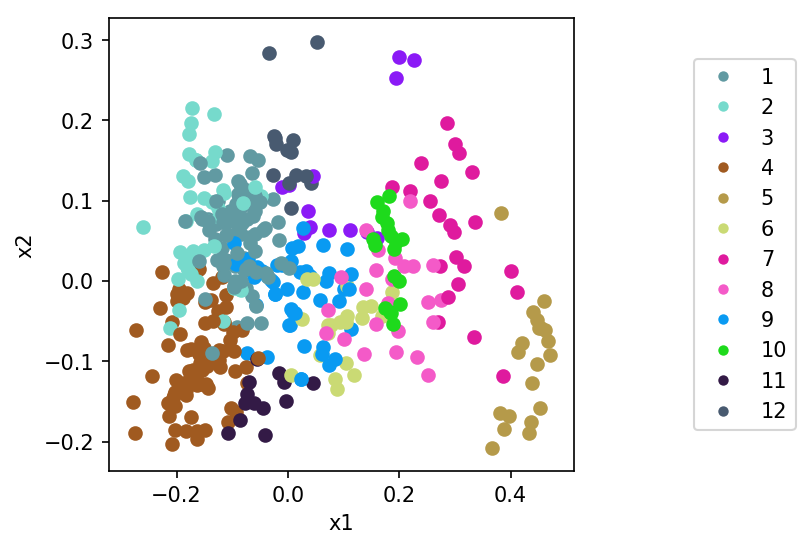

In [43]:

col = get_colors (len(np.unique(y_pred)))
legend_elements = [Line2D([0], [0],markerfacecolor=tuple(x/255.0 for x in color), marker = 'o', color = 'w',
                         label=index+1) for index,color in enumerate(col)]
figure = plt.figure(figsize=(4, 4), dpi=150)
for j in range(400):
    plt.scatter(x_PCA[j][0],x_PCA[j][1], color = tuple(x/255.0 for x in col[y_pred[j]-1]))
legend = plt.legend(handles = legend_elements,loc = 'right',bbox_to_anchor=(1.5,0.5))
figure.savefig('samplefigure', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.xlabel("x1")
plt.ylabel("x2")

In [44]:
np.unique(y_pred)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)